In [10]:
from google.colab import files

In [51]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving oily_0d852556c21686e16906_jpg.rf.30a84748412c51c7490001e78ac9b158.jpg to oily_0d852556c21686e16906_jpg.rf.30a84748412c51c7490001e78ac9b158 (1).jpg


In [5]:
pip install dlib

In [48]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.7 MB/s eta 0:00:00


Saving oily_2cdb581b88b7e8fd4441_jpg.rf.f0a17ca24835514efd1e18ee2e0fa841.jpg to oily_2cdb581b88b7e8fd4441_jpg.rf.f0a17ca24835514efd1e18ee2e0fa841 (1).jpg
1/1 [==============================] - 0s 221ms/step
Face cropped and saved successfully.


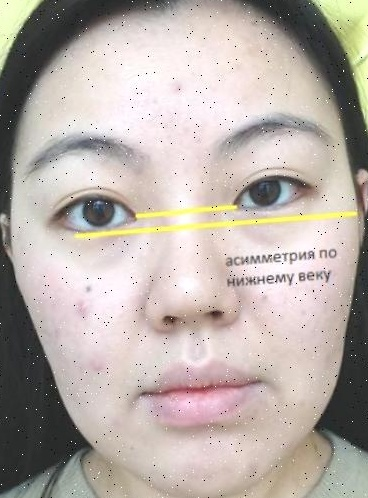

In [117]:
from mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print("Face cropped and saved successfully.")
        return True
    else:
        print("No faces were detected in the image.")
        return False

# Upload the image file
uploaded = files.upload()
filename = next(iter(uploaded))

# Input image path and output face image path
input_image_path = filename
output_face_path = "face_image.jpg"

# Detect and save the face
detect_and_save_face(input_image_path, output_face_path)

# Display the cropped face image
face_img = cv2.imread(output_face_path)
cv2_imshow(face_img)


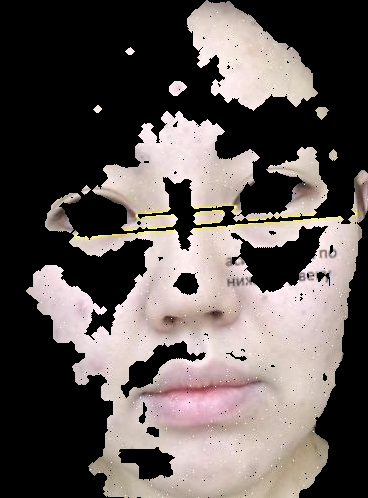

In [118]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to display skin regions within the cropped face image
def display_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Display the skin regions
    cv2_imshow(skin_regions)

# Read the cropped face image
face_img = cv2.imread("face_image.jpg")

# Display skin regions within the cropped face image
display_skin_regions(face_img)


In [132]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import files

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print(f"Face cropped and saved successfully: {output_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to display skin regions within the cropped face image
def display_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Display the skin regions
    cv2_imshow(skin_regions)

# Function to process a set of images
def process_images(image_paths):
    for i, image_path in enumerate(image_paths):
        output_face_path = f"face_image_{i+1}.jpg"
        if detect_and_save_face(image_path, output_face_path):
            # Read the cropped face image
            face_img = cv2.imread(output_face_path)

            # Display skin regions within the cropped face image
            display_skin_regions(face_img)

# Upload the image files
uploaded = files.upload()

# Get the list of uploaded image file paths
image_paths = list(uploaded.keys())

# Process the set of images
process_images(image_paths)




Saving dry-skin_63_jpeg.rf.0a58fa86d629f3ea5148bd0aada00a05.jpg to dry-skin_63_jpeg.rf.0a58fa86d629f3ea5148bd0aada00a05.jpg
1/1 [==============================] - 0s 131ms/step
No faces were detected in the image: dry-skin_63_jpeg.rf.0a58fa86d629f3ea5148bd0aada00a05.jpg


Saving oily_2e46a3c2d47fd1ba91f3_jpg.rf.01e894471ccc8f25a7538973c20ab7ee.jpg to oily_2e46a3c2d47fd1ba91f3_jpg.rf.01e894471ccc8f25a7538973c20ab7ee (11).jpg
1/1 [==============================] - 0s 158ms/step
Face cropped and saved successfully: face_image_1.jpg


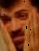

In [135]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import files

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print(f"Face cropped and saved successfully: {output_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to display skin regions within the cropped face image
def display_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Display the skin regions
    cv2_imshow(skin_regions)

# Function to process a set of images
def process_images(image_paths):
    for i, image_path in enumerate(image_paths):
        output_face_path = f"face_image_{i+1}.jpg"
        if detect_and_save_face(image_path, output_face_path):
            # Read the cropped face image
            face_img = cv2.imread(output_face_path)

            # Display skin regions within the cropped face image
            display_skin_regions(face_img)
        else:
            # If no face is detected, extract skin regions or get the image as a whole
            img = cv2.imread(image_path)
            skin_mask = skin_detection(img)
            if np.any(skin_mask):
                skin_regions = cv2.bitwise_and(img, img, mask=skin_mask)
                cv2_imshow(skin_regions)
            else:
                cv2_imshow(img)

# Upload the image files
uploaded = files.upload()

# Get the list of uploaded image file paths
image_paths = list(uploaded.keys())

# Process the set of images
process_images(image_paths)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 148ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Faces/face_image_1.jpg


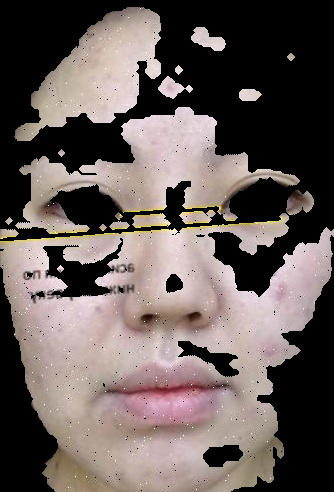

Processed skin image of detected face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_1.jpg
1/1 [==============================] - 0s 34ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Faces/face_image_2.jpg


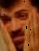

Processed skin image of detected face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_2.jpg
1/1 [==============================] - 0s 35ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Faces/face_image_3.jpg


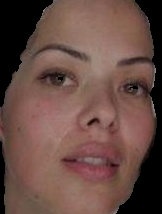

Processed skin image of detected face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_3.jpg
1/1 [==============================] - 0s 34ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Faces/face_image_4.jpg


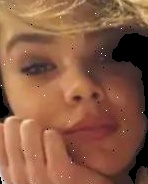

Processed skin image of detected face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_4.jpg
1/1 [==============================] - 0s 26ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/dry-skin_25_jpeg.rf.8ee44e7687a4f19c38211de4900e9d21.jpg
Processed skin image of non-face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_5.jpg
1/1 [==============================] - 0s 29ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/dry-skin_15_jpeg.rf.bd23a07cc38fba4c6255ece166f3bea8.jpg
Processed skin image of non-face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_6.jpg
1/1 [==============================] - 0s 26ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/dry-skin_10_jpeg.rf.186e9e08dc151f3d9c01eadcbcaee297.jpg
Processed skin image of non-face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_7.jpg
1/1 [====================

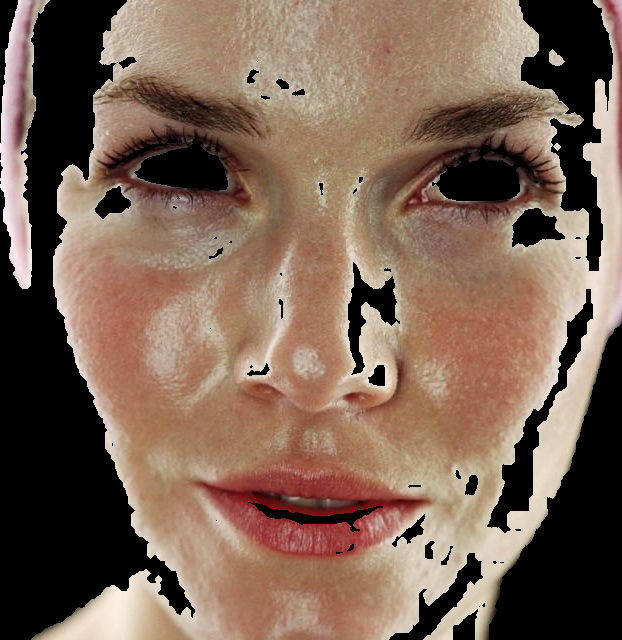

Processed skin image of detected face saved successfully: /content/drive/My Drive/Processed_Skin/skin_image_8.jpg


In [148]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print(f"Face cropped and saved successfully: {output_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to display skin regions within the cropped face image
def display_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Display the skin regions
    cv2_imshow(skin_regions)

def process_images(image_paths):
    for i, image_path in enumerate(image_paths):
        output_face_path = f"/content/drive/My Drive/Processed_Faces/face_image_{i+1}.jpg"
        output_skin_path = f"/content/drive/My Drive/Processed_Skin/skin_image_{i+1}.jpg"
        output_original_path = f"/content/drive/My Drive/Processed_Original/original_image_{i+1}.jpg"

        if detect_and_save_face(image_path, output_face_path):
            # Read the cropped face image
            face_img = cv2.imread(output_face_path)

            # Display skin regions within the cropped face image
            display_skin_regions(face_img)

            # Save skin regions of the detected face
            skin_mask = skin_detection(face_img)
            skin_regions = cv2.bitwise_and(face_img, face_img, mask=skin_mask)
            cv2.imwrite(output_skin_path, skin_regions)
            print(f"Processed skin image of detected face saved successfully: {output_skin_path}")
        else:
            # If no face is detected
            img = cv2.imread(image_path)
            skin_mask = skin_detection(img)
            if np.any(skin_mask):
                # If skin is detected but no face, save the skin regions
                skin_regions = cv2.bitwise_and(img, img, mask=skin_mask)
                cv2.imwrite(output_skin_path, skin_regions)
                print(f"Processed skin image of non-face saved successfully: {output_skin_path}")
            else:
                # If no face and no skin detected, save the original image
                cv2.imwrite(output_original_path, img)
                print(f"Original image saved successfully: {output_original_path}")

# Process the images from the "Dataset" folder in Google Drive
image_folder_path = "/content/drive/My Drive/Dataset/"
image_paths = [image_folder_path + file_name for file_name in os.listdir(image_folder_path)]

# Process the set of images
process_images(image_paths)


In [150]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print(f"Face cropped and saved successfully: {output_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to process a set of images
def process_images(image_paths, output_folder):
    for i, image_path in enumerate(image_paths):
        output_face_path = f"{output_folder}/face_image_{i+1}.jpg"
        if detect_and_save_face(image_path, output_face_path):
            # Read the cropped face image
            face_img = cv2.imread(output_face_path)

            # Display skin regions within the cropped face image
            display_skin_regions(face_img, f"{output_folder}/skin_image_{i+1}.jpg")
        else:
            # If no face is detected, extract skin regions or get the image as a whole
            img = cv2.imread(image_path)
            skin_mask = skin_detection(img)
            if np.any(skin_mask):
                skin_regions = cv2.bitwise_and(img, img, mask=skin_mask)
                cv2.imwrite(f"{output_folder}/skin_image_{i+1}.jpg", skin_regions)
            else:
                cv2.imwrite(f"{output_folder}/original_image_{i+1}.jpg", img)

# Function to display skin regions within the cropped face image
def display_skin_regions(image, output_path):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Save the skin regions
    cv2.imwrite(output_path, skin_regions)
    print(f"Skin regions saved successfully: {output_path}")

# Path to the input folder in Google Drive
input_folder = '/content/drive/My Drive/Dataset'
# Path to the output folder in Google Drive
output_folder = '/content/drive/My Drive/Processed_Images'

# List files in the input folder
import os
image_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process the images
process_images(image_files, output_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 138ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Images/face_image_1.jpg
Skin regions saved successfully: /content/drive/My Drive/Processed_Images/skin_image_1.jpg
1/1 [==============================] - 0s 28ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Images/face_image_2.jpg
Skin regions saved successfully: /content/drive/My Drive/Processed_Images/skin_image_2.jpg
1/1 [==============================] - 0s 43ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Images/face_image_3.jpg
Skin regions saved successfully: /content/drive/My Drive/Processed_Images/skin_image_3.jpg
1/1 [==============================] - 0s 45ms/step
Face cropped and saved successfully: /content/drive/My Drive/Processed_Images/face_image_4.jpg
Skin regi

In [151]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the processed skin image
def detect_and_process_skin(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Process skin regions within the cropped face image
        processed_skin_image = process_skin_regions(face_img)

        # Save the processed skin image
        cv2.imwrite(output_path, processed_skin_image)
        print(f"Processed skin image saved successfully: {output_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to process skin regions in an image
def process_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    return skin_regions

# Function to process a set of images
def process_images(image_paths, output_folder):
    for i, image_path in enumerate(image_paths):
        output_skin_path = f"{output_folder}/processed_skin_image_{i+1}.jpg"
        detect_and_process_skin(image_path, output_skin_path)

# Path to the input folder in Google Drive
input_folder = '/content/drive/My Drive/Dataset'
# Path to the output folder in Google Drive
output_folder = '/content/drive/My Drive/Processed_Images'

# List files in the input folder
import os
image_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process the images
process_images(image_files, output_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 138ms/step
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_image_1.jpg
1/1 [==============================] - 0s 31ms/step
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_image_2.jpg
1/1 [==============================] - 0s 27ms/step
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_image_3.jpg
1/1 [==============================] - 0s 30ms/step
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_image_4.jpg
1/1 [==============================] - 0s 20ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/dry-skin_25_jpeg.rf.8ee44e7687a4f19c38211de4900e9d21.jpg
1/1 [==============================] - 0s 34ms/s

In [155]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the processed skin image
def detect_and_process_skin(image_path, output_folder):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Process skin regions within the cropped face image
        processed_skin_image = process_skin_regions(face_img)

        # Save the processed skin image
        output_skin_path = f"{output_folder}/processed_skin_{os.path.basename(image_path)}"
        cv2.imwrite(output_skin_path, processed_skin_image)
        print(f"Processed skin image saved successfully: {output_skin_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        # If no faces are detected, extract skin regions or save the original image
        skin_mask = skin_detection(img)
        if np.any(skin_mask):
            # Extract skin regions using the mask
            skin_regions = cv2.bitwise_and(img, img, mask=skin_mask)
            output_skin_path = f"{output_folder}/processed_skin_{os.path.basename(image_path)}"
            cv2.imwrite(output_skin_path, skin_regions)
            print(f"Processed skin image saved successfully: {output_skin_path}")
        else:
            # Save the original image if no skin regions are detected
            output_original_path = f"{output_folder}/original_{os.path.basename(image_path)}"
            cv2.imwrite(output_original_path, img)
            print(f"No skin regions detected. Original image saved: {output_original_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to process skin regions in an image
def process_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    return skin_regions

# Function to process a set of images
def process_images(image_paths, output_folder):
    for i, image_path in enumerate(image_paths):
        detect_and_process_skin(image_path, output_folder)

# Path to the input folder in Google Drive
input_folder = '/content/drive/My Drive/Dataset'
# Path to the output folder in Google Drive
output_folder = '/content/drive/My Drive/Processed_Images'

# List files in the input folder
import os
image_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process the images
process_images(image_files, output_folder)


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 15ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/burned-skin_6_jpeg.rf.da75060691c892b61db16ca65a349854.jpg
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_burned-skin_6_jpeg.rf.da75060691c892b61db16ca65a349854.jpg
2/2 [==============================] - 0s 14ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/burned-skin_7_png.rf.a300369b540c8d639b9dac68d33d3024.jpg
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_burned-skin_7_png.rf.a300369b540c8d639b9dac68d33d3024.jpg
2/2 [==============================] - 0s 16ms/step
No faces were detected in the image: /content/drive/My Drive/Dataset/burned-skin_6_jpeg.rf.6f3be2e1a88dc36325e0153badd75119.jpg
Processed skin image saved successfully: /content/drive/My Drive/Processed_Images/processed_skin_bu

Load Preprocessed images from the google drive folder Processed_Images

In [159]:
path='/content/drive/MyDrive/Processed_Images'

In [160]:
import os

# Path to the directory containing your images
directory_path = '/content/drive/MyDrive/Processed_Images'

# List all files in the directory
files = os.listdir(directory_path)

# Count the number of image files (assuming images have common extensions like .jpg, .png, etc.)
image_extensions = ['.jpg']
# Add more if needed
image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions)

print(f'Total number of images in the directory: {image_count}')


Total number of images in the directory: 425


In [161]:

from PIL import Image

# Dictionary to store unique sizes
sizes = {}

# Iterate over each image file
for file in files:
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        try:
            # Open the image
            with Image.open(file_path) as img:
                # Get the size (width, height) tuple
                size = img.size
                # Add the size to the dictionary
                if size in sizes:
                    sizes[size] += 1
                else:
                    sizes[size] = 1
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Print the unique sizes and their frequencies
print("Different sizes of images in the dataset:")
for size, count in sizes.items():
    print(f"Size: {size}, Count: {count}")


Different sizes of images in the dataset:
Size: (333, 392), Count: 3
Size: (622, 640), Count: 4
Size: (609, 640), Count: 1
Size: (640, 640), Count: 299
Size: (334, 394), Count: 1
Size: (76, 82), Count: 1
Size: (563, 640), Count: 1
Size: (236, 332), Count: 3
Size: (472, 640), Count: 3
Size: (535, 498), Count: 1
Size: (225, 260), Count: 1
Size: (536, 473), Count: 1
Size: (294, 457), Count: 3
Size: (509, 539), Count: 1
Size: (489, 586), Count: 1
Size: (175, 143), Count: 1
Size: (246, 325), Count: 1
Size: (286, 280), Count: 1
Size: (171, 286), Count: 1
Size: (273, 347), Count: 1
Size: (295, 448), Count: 1
Size: (279, 388), Count: 1
Size: (445, 387), Count: 1
Size: (368, 323), Count: 1
Size: (325, 436), Count: 1
Size: (324, 436), Count: 1
Size: (443, 387), Count: 1
Size: (298, 472), Count: 1
Size: (296, 410), Count: 1
Size: (179, 215), Count: 1
Size: (210, 385), Count: 1
Size: (170, 233), Count: 1
Size: (205, 385), Count: 1
Size: (427, 620), Count: 1
Size: (429, 620), Count: 1
Size: (280, 3

Resize images into 224

In [170]:
import os
from PIL import Image
import cv2
import numpy as np

# Define the resize_with_aspect_ratio function
def resize_with_aspect_ratio(image, target_size=(248, 248)):
    h, w = image.shape[:2]
    aspect_ratio = w / h

    if aspect_ratio > 1:
        new_w = target_size[0]
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = target_size[1]
        new_w = int(new_h * aspect_ratio)

    resized_image = cv2.resize(image, (new_w, new_h))

    # Add padding if necessary
    top_pad = (target_size[1] - new_h) // 2
    bottom_pad = target_size[1] - new_h - top_pad
    left_pad = (target_size[0] - new_w) // 2
    right_pad = target_size[0] - new_w - left_pad

    resized_image = cv2.copyMakeBorder(resized_image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT)

    return resized_image

# Path to the directory containing your images
directory_path = '/content/drive/MyDrive/Processed_Images'

# List all files in the directory
files = os.listdir(directory_path)

# Count the number of image files (assuming images have common extensions like .jpg, .png, etc.)
image_extensions = ['.jpg']
# Add more if needed
image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions)

print(f'Total number of images in the directory: {image_count}')

# Dictionary to store unique sizes
sizes = {}

# List to store resized images
resized_images = []

# Target size for resizing
target_size = (224, 224)

# Iterate over each image file
for file in files:
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        try:
            # Open the image
            with Image.open(file_path) as img:
                # Convert the image to a numpy array
                image_array = np.array(img)
                # Resize the image while maintaining aspect ratio
                resized_img = resize_with_aspect_ratio(image_array, target_size)
                # Append the resized image to the list
                resized_images.append(resized_img)
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Convert the list of resized images to a numpy array
resized_images_array = np.array(resized_images)

print(f'Shape of the resized image dataset: {resized_images_array.shape}')


Total number of images in the directory: 425
Shape of the resized image dataset: (425, 224, 224, 3)


In [171]:
import os

# Path to the directory containing your images
directory_path = '/content/drive/MyDrive/Processed_Images'

# List all files in the directory
files = os.listdir(directory_path)

# Count the number of image files (assuming images have common extensions like .jpg, .png, etc.)
image_extensions = ['.jpg']
# Add more if needed
image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions)

print(f'Total number of images in the directory: {image_count}')


Total number of images in the directory: 425


In [172]:
from PIL import Image

# Dictionary to store unique sizes
sizes = {}

# Iterate over each image file
for file in files:
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        try:
            # Open the image
            with Image.open(file_path) as img:
                # Get the size (width, height) tuple
                size = img.size
                # Add the size to the dictionary
                if size in sizes:
                    sizes[size] += 1
                else:
                    sizes[size] = 1
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Print the unique sizes and their frequencies
print("Different sizes of images in the dataset:")
for size, count in sizes.items():
    print(f"Size: {size}, Count: {count}")


Different sizes of images in the dataset:
Size: (224, 224), Count: 425


In [173]:
import cv2
import numpy as np

# Define the resize_with_aspect_ratio function
def resize_with_aspect_ratio(image, target_size=(248, 248)):
    h, w = image.shape[:2]
    aspect_ratio = w / h

    if aspect_ratio > 1:
        new_w = target_size[0]
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = target_size[1]
        new_w = int(new_h * aspect_ratio)

    resized_image = cv2.resize(image, (new_w, new_h))

    # Add padding if necessary
    top_pad = (target_size[1] - new_h) // 2
    bottom_pad = target_size[1] - new_h - top_pad
    left_pad = (target_size[0] - new_w) // 2
    right_pad = target_size[0] - new_w - left_pad

    resized_image = cv2.copyMakeBorder(resized_image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT)

    return resized_image

# List to store resized images
resized_images = []

# Target size for resizing
target_size = (224, 224)

# Iterate over each image file
for file in files:
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        try:
            # Open the image
            with Image.open(file_path) as img:
                # Convert the image to a numpy array
                image_array = np.array(img)
                # Resize the image while maintaining aspect ratio
                resized_img = resize_with_aspect_ratio(image_array, target_size)
                # Append the resized image to the list
                resized_images.append(resized_img)
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Convert the list of resized images to a numpy array
resized_images_array = np.array(resized_images)

print(f'Shape of the resized image dataset: {resized_images_array.shape}')

Shape of the resized image dataset: (425, 224, 224, 3)


In [174]:
# List to store grayscale images
grayscale_images = []

# Iterate over each resized image
for resized_img in resized_images:
    # Convert the image to grayscale
    grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    # Append the grayscale image to the list
    grayscale_images.append(grayscale_img)

# Convert the list of grayscale images to a numpy array
grayscale_images_array = np.array(grayscale_images)

print(f'Shape of the grayscale image dataset: {grayscale_images_array.shape}')


Shape of the grayscale image dataset: (425, 224, 224)


NameError: name 'grayscale_images_array' is not defined

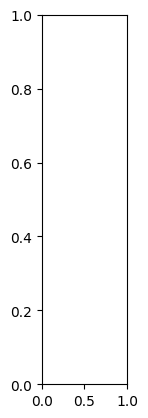

In [1]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images_to_display = 5

# Display the first 5 grayscale images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(grayscale_images_array[i], cmap='gray')
    plt.axis('off')

plt.show()
